# Assignement 1 ML

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 10)

In [17]:
training_set = np.genfromtxt('Train/Training Labels.txt')
test_set = np.genfromtxt('Test/Test Labels.txt')

In [6]:
def calculateInputMatrix():
    X = np.zeros((2400, 784))
    for i in range (0, X.shape[0]):
        img = plt.imread("Train/"+str(i+1)+'.jpg')
        rows, cols = img.shape 
        img_size = rows*cols
        img_1D_vector = img.reshape(img_size)
        X[i] = img_1D_vector
    return X

X = calculateInputMatrix()
#to be checked
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
#print(X.shape)

In [5]:
def train(classLabel):
    class_label_range = classLabel*240
    t = np.genfromtxt('Train/Training Labels.txt')
    for j in range(0, t.shape[0]):
        if (t[j] == classLabel):
            t[j] = 1
        else:
            t[j] = 0
    X_trans = np.transpose(X)
    X_X_transpose_inv = np.linalg.pinv(np.dot(X_trans, X))
#     print(X_X_transpose_inv.shape)
#     print(X.shape)
#     print(X_trans.shape)
    eqt = np.dot(np.dot((X_X_transpose_inv), X_trans), t)
    return eqt

In [7]:
W = np.zeros((10, 785))
for i in range (0, 10):
    W[i] = train(i)

In [8]:
def classify(image):
    img = plt.imread(image)
    rows, cols = img.shape 
    img_size = rows*cols
    img_1D_vector = img.reshape(img_size)[:, None]
    #to be checked
    img_1D_vector = np.concatenate([np.ones((1,1)), img_1D_vector], axis=0)
    max = 0
    classed = 0
    for i in range (0, 10):
        curr_max = np.dot(np.transpose(W[i]), img_1D_vector)
        if (max < curr_max):
            max = curr_max
            classed = i
        #print(curr_max)
    return classed
#print(predicts[0].shape)
#print(classify("Test/200.jpg"))

# getting the confusion matrix of the prediction

In [36]:
confusion_matrix = np.zeros((10, 10))
predictions = np.zeros((200, 1))
for i in range (0, 200):
    predictions[i] = classify('Test/'+str(i+1)+'.jpg')
np.asarray((unique_elements, counts_elements))
for i in range (0, 10):
    ran = i*20
    unique_elements, counts_elements = np.unique(predictions[ran:ran+20], return_counts=True)
    for j in range(0, counts_elements.shape[0]):
        val = unique_elements[j]
        count = counts_elements[j]
        confusion_matrix[i][int(val)] = int(count)
confusion_matrix

array([[19.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0., 20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  3., 11.,  2.,  2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 17.,  0.,  1.,  0.,  0.,  2.,  0.],
       [ 0.,  0.,  0.,  0., 17.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0., 14.,  1.,  0.,  2.,  2.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 20.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  0.,  0.,  0., 15.,  0.,  3.],
       [ 0.,  0.,  1.,  0.,  0.,  3.,  0.,  0., 15.,  1.],
       [ 1.,  0.,  0.,  1.,  1.,  1.,  0.,  4.,  0., 12.]])

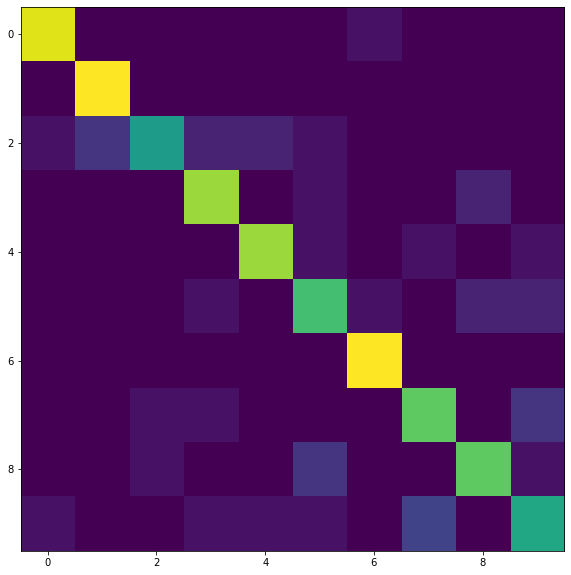

In [37]:
ax = plt.imshow(confusion_matrix)
plt.savefig('Confusion'+'.jpg')

In [9]:
performance = np.sum(predictions - test_set)**2
print(performance)

1000000.0


In [28]:
accuracy = 0
for i in range(0, 200):
    if(predictions[i] == test_set[i]):
        accuracy +=1
print('accuracy is:' + str((accuracy/200)*100) + '%')

accuracy is:80.0%
